# Load and inspect data

In [134]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [135]:
df = pd.read_csv('StudentsPerformance.csv')

In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [137]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


#  Check Dataset Shape

In [138]:
df.shape

(1000, 8)

#  Handle Missing Values

In [139]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [311]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


# Analyze Correlations and Visualize

In [140]:
corr_matrix=df.corr()

In [141]:
corr_matrix

,math score,reading score,writing score
math score,1.000000,0.817580,0.802642
reading score,0.817580,1.000000,0.954598
writing score,0.802642,0.954598,1.000000


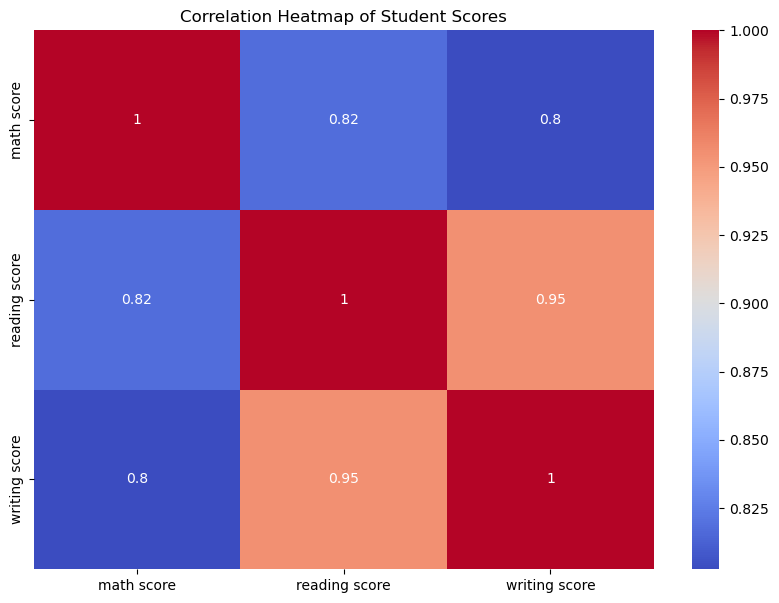

In [321]:
plt.figure(figsize=(10,7))
sns.heatmap(corr_matrix,cmap="coolwarm",annot=True,)
plt.title("Correlation Heatmap of Student Scores")
plt.show()

#  Define Features and Target Variable

In [426]:
x = df.drop(columns=['math score'])
x

,gender,race/ethnicity,parental level of education,lunch,test preparation course,reading score,writing score
0,female,group B,bachelor's degree,standard,none,0.193999,0.391492
1,female,group C,some college,standard,completed,1.427476,1.313269
2,female,group B,master's degree,standard,none,1.770109,1.642475
3,male,group A,associate's degree,free/reduced,none,-0.833899,-1.583744
4,male,group C,some college,standard,none,0.605158,0.457333
...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,2.044215,1.774157
996,male,group C,high school,free/reduced,none,-0.970952,-0.859491
997,female,group C,high school,free/reduced,completed,0.125472,-0.201079
998,female,group D,some college,standard,completed,0.605158,0.589015


In [427]:
y = df['math score'] 
y

0      0.390024
1      0.192076
2      1.577711
3     -1.259543
4      0.653954
         ...   
995    1.445746
996   -0.269803
997   -0.467751
998    0.126093
999    0.719937
Name: math score, Length: 1000, dtype: float64

# Identify and Treat Outliers

In [428]:
numerical_cols = ['math score', 'reading score', 'writing score']

In [429]:
Q1 = df[numerical_cols].quantile(0.25)
Q3 = df[numerical_cols].quantile(0.75)
IQR = Q3 - Q1
IQR

math score       1.319653
reading score    1.370530
writing score    1.399126
dtype: float64

In [430]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Convert Categorical columns into numerical

In [471]:
X_encoded = pd.get_dummies(X, drop_first=True)

# Normalize Data Using StandardScaler

In [472]:
from sklearn.preprocessing import StandardScaler

In [473]:
scaler = StandardScaler()

In [474]:
X_scaled = scaler.fit_transform(X_encoded)

In [475]:
X_scaled = pd.DataFrame(X_scaled, columns=X_encoded.columns)

# Split Data into Training and Testing Sets

In [476]:
from sklearn.model_selection import train_test_split

In [477]:
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.2,random_state=42)

In [478]:
X_train.shape

(800, 14)

In [479]:
X_test.shape

(200, 14)

In [480]:
y_train.shape

(800,)

In [481]:
y_test.shape

(200,)

In [482]:
X_scaled.head()

,reading score,writing score,gender_male,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_standard,test preparation course_none
0,0.193999,0.391492,-0.964625,2.064742,-0.684419,-0.59583,-0.403473,2.733967,-0.493742,-0.250398,-0.540361,-0.466933,0.741881,0.746748
1,1.427476,1.313269,-0.964625,-0.484322,1.461094,-0.59583,-0.403473,-0.365769,-0.493742,-0.250398,1.850616,-0.466933,0.741881,-1.339140
2,1.770109,1.642475,-0.964625,2.064742,-0.684419,-0.59583,-0.403473,-0.365769,-0.493742,3.993639,-0.540361,-0.466933,0.741881,0.746748
3,-0.833899,-1.583744,1.036672,-0.484322,-0.684419,-0.59583,-0.403473,-0.365769,-0.493742,-0.250398,-0.540361,-0.466933,-1.347925,0.746748
4,0.605158,0.457333,1.036672,-0.484322,1.461094,-0.59583,-0.403473,-0.365769,-0.493742,-0.250398,1.850616,-0.466933,0.741881,0.746748


# Train Model and Evaluate Performance

# RandomForest

In [483]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

In [484]:
rf_model = RandomForestRegressor(n_estimators=100, max_depth=20, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=20, random_state=42)

In [485]:
y_pred = rf_model.predict(X_test)

In [486]:
r2_score = r2_score(y_test, y_pred)  

In [487]:
print(r2_score)

0.8490794795498872
